In [29]:
from scipy.fft import fft
import pickle
import matplotlib.pyplot as plt

# Load the dataset

with open ('interaction_matrices.pkl', 'rb') as int_matrices:
    interaction_matrices = pickle.load(int_matrices)

with open ('spectra_dataset.pkl', 'rb') as spec_dataset:
    spec_dataset = pickle.load(spec_dataset)



In [53]:
print(binned_averages.shape)

torch.Size([10000, 2000])


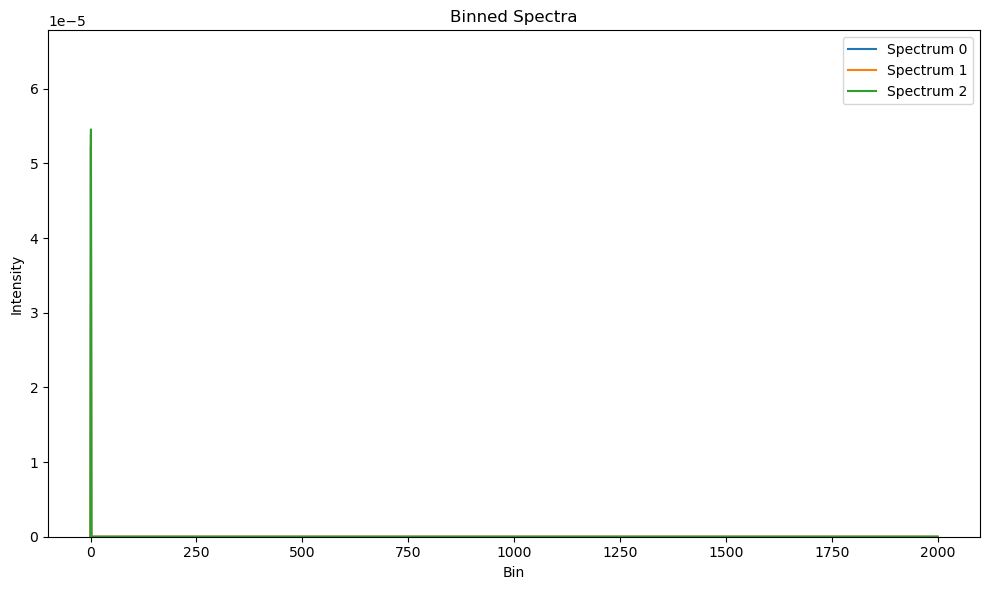

In [60]:
import torch
import matplotlib.pyplot as plt

# Assuming you have already performed the binning process and obtained the `binned_averages` tensor

# Select the indices of the spectra you want to plot
indices_to_plot = [0, 1, 2]  # Modify this list to select the desired indices

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the selected spectra
for index in indices_to_plot:
    spectrum = binned_averages[index]
    ax.plot(spectrum.numpy(), label=f"Spectrum {index}")

# Set the labels and title
ax.set_xlabel("Bin")
ax.set_ylabel("Intensity")
ax.set_title("Binned Spectra")
ax.set_ylim(bottom=0, top=binned_averages.max().item())


# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [61]:
min_intensity = spec_dataset.min()
max_intensity = spec_dataset.max()
print(f"Minimum intensity: {min_intensity}")
print(f"Maximum intensity: {max_intensity}")


Minimum intensity: 0.0
Maximum intensity: 0.005322653334587812


In [5]:
import sklearn
from sklearn.model_selection import train_test_split

spec_test, spec_train, int_test, int_train = train_test_split(spec_dataset, interaction_matrices, test_size=0.2, random_state=42)
spec_test, spec_val, int_test, int_val = train_test_split(spec_test, int_test, test_size=0.5, random_state=42)